In [1]:
import pandas as pd

# Baca file Excel
file_path = "./Dataset/fixed_formatData.xlsx"
df = pd.read_excel(file_path)
df

,R,G,B,IR_Intensity (%),Perlakuan,Pengambilan
0,151,149.0,106.40,73,0,1
1,151,149.0,109.78,73,0,1
2,149,149.0,106.40,73,0,1
3,149,149.0,130.06,73,0,1
4,149,151.4,106.40,73,0,1
...,...,...,...,...,...,...
1436,147,151.4,136.82,64,3,4
1437,149,153.8,140.20,64,3,4
1438,147,153.8,113.16,64,3,4
1439,149,153.8,123.30,64,3,4


In [2]:
# Hitung rata-rata R, G, dan B berdasarkan kombinasi Perlakuan dan Pengambilan
mean_rgb = df.groupby(['Perlakuan', 'Pengambilan'])[['R', 'G', 'B']].mean().reset_index()

# Tampilkan hasil
print("Rata-rata R, G, dan B per Perlakuan dan Pengambilan:")
print(mean_rgb)

Rata-rata R, G, dan B per Perlakuan dan Pengambilan:
    Perlakuan  Pengambilan           R           G           B
0           0            1  148.693333  150.792000  117.351200
1           0            2  143.643564  147.645545  111.587129
2           0            3  143.641026  146.476923  109.260000
3           0            4  130.722222  136.500000   92.551389
4           1            1  151.890244  152.248780  114.314146
5           1            2  146.933333  150.376000  116.044267
6           1            3  145.550562  148.325843  114.868989
7           1            4  153.057377  154.822951  122.856721
8           2            1  152.852941  154.929412  123.797059
9           2            2  150.090909  153.772727  124.913182
10          2            3  147.514019  150.256075  117.487664
11          2            4  145.483871  149.464516  115.595054
12          3            1  128.541667  131.066667   85.134167
13          3            2  159.226804  159.936082  121.313814
14

In [3]:
# Hitung Nilai Excess Green
mean_rgb['Excess_Green'] = (2 * mean_rgb['G']) - (mean_rgb['R'] + mean_rgb['B'])

# Menampilkan Hasil Nilai Excess Green
excess_green = mean_rgb[['Perlakuan', 'Pengambilan', 'Excess_Green']]
print(excess_green)

    Perlakuan  Pengambilan  Excess_Green
0           0            1     35.539467
1           0            2     40.060396
2           0            3     40.052821
3           0            4     49.726389
4           1            1     38.293171
5           1            2     37.774400
6           1            3     36.232135
7           1            4     33.731803
8           2            1     33.208824
9           2            2     32.541364
10          2            3     35.510467
11          2            4     37.850108
12          3            1     48.457500
13          3            2     39.331546
14          3            3     46.723778
15          3            4     31.713265


In [4]:
# Data nilai absorbansi per perlakuan
data = {
    'Perlakuan': [0, 1, 2, 3],
    'A665': [0.6247, 0.6780, 0.6781, 0.6888],
    'A645': [0.6494, 0.6959, 0.6960, 0.7056],
    'A669': [0.6179, 0.6719, 0.6720, 0.6822],
}

# Buat DataFrame
df_chlor = pd.DataFrame(data)
df_chlor

,Perlakuan,A665,A645,A669
0,0,0.6247,0.6494,0.6179
1,1,0.6780,0.6959,0.6719
2,2,0.6781,0.6960,0.6720
3,3,0.6888,0.7056,0.6822


In [5]:
# Hitung Klorofil A dan B
df_chlor['Klorofil_A'] = 12.7 * df_chlor['A665'] - 2.69 * df_chlor['A645']
df_chlor['Klorofil_B'] = 22.9 * df_chlor['A645'] - 4.68 * df_chlor['A669']
df_chlor['Total_Klorofil'] = 20.2 * df_chlor['A645'] + 8.02 * df_chlor['A665']

# Tampilkan hasil
print(df_chlor[['Perlakuan', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']])

   Perlakuan  Klorofil_A  Klorofil_B  Total_Klorofil
0          0    6.186804   11.979488       18.127974
1          1    6.738629   12.791618       19.494740
2          2    6.739630   12.793440       19.497562
3          3    6.849696   12.965544       19.777296


In [6]:
combined = pd.merge(excess_green, df_chlor[['Perlakuan', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']], on='Perlakuan')

print("Data Gabungan:")
print(combined)

Data Gabungan:
    Perlakuan  Pengambilan  Excess_Green  Klorofil_A  Klorofil_B  \
0           0            1     35.539467    6.186804   11.979488   
1           0            2     40.060396    6.186804   11.979488   
2           0            3     40.052821    6.186804   11.979488   
3           0            4     49.726389    6.186804   11.979488   
4           1            1     38.293171    6.738629   12.791618   
5           1            2     37.774400    6.738629   12.791618   
6           1            3     36.232135    6.738629   12.791618   
7           1            4     33.731803    6.738629   12.791618   
8           2            1     33.208824    6.739630   12.793440   
9           2            2     32.541364    6.739630   12.793440   
10          2            3     35.510467    6.739630   12.793440   
11          2            4     37.850108    6.739630   12.793440   
12          3            1     48.457500    6.849696   12.965544   
13          3            2     39

In [27]:

# Import library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Fitur
X = combined[['Perlakuan', 'Pengambilan', 'Excess_Green']]

print("total data:", len(combined))

# --- Klorofil A ---
y_A = combined['Klorofil_A']
X_train_A, X_test_A, y_train_A, y_test_A = train_test_split(X, y_A, test_size=0.2, random_state=42)
print("Total data Klorofil A:", len(y_A))
print("Data latih Klorofil A:", len(y_train_A))
print("Data uji Klorofil A:", len(y_test_A))

model_A = LinearRegression()
model_A.fit(X_train_A, y_train_A)
y_pred_A = model_A.predict(X_test_A)

print("Klorofil A:")
print("MSE:", mean_squared_error(y_test_A, y_pred_A))
print("R2:", r2_score(y_test_A, y_pred_A))

# --- Klorofil B ---
y_B = combined['Klorofil_B']
X_train_B, X_test_B, y_train_B, y_test_B = train_test_split(X, y_B, test_size=0.2, random_state=42)
print("Total data Klorofil B:", len(y_B))
print("Data latih Klorofil B:", len(y_train_B))
print("Data uji Klorofil B:", len(y_test_B))

model_B = LinearRegression()
model_B.fit(X_train_B, y_train_B)
y_pred_B = model_B.predict(X_test_B)

print("\nKlorofil B:")
print("MSE:", mean_squared_error(y_test_B, y_pred_B))
print("R2:", r2_score(y_test_B, y_pred_B))

# --- Total Klorofil ---
y_total = combined['Total_Klorofil']
X_train_total, X_test_total, y_train_total, y_test_total = train_test_split(X, y_total, test_size=0.2, random_state=42)
print("Total data Total Klorofil:", len(y_total))
print("Data latih Total Klorofil:", len(y_train_total))
print("Data uji Total Klorofil:", len(y_test_total))

model_total = LinearRegression()
model_total.fit(X_train_total, y_train_total)
y_pred_total = model_total.predict(X_test_total)

print("\nTotal Klorofil:")
print("MSE:", mean_squared_error(y_test_total, y_pred_total))
print("R2:", r2_score(y_test_total, y_pred_total))


total data: 16
Total data Klorofil A: 16
Data latih Klorofil A: 12
Data uji Klorofil A: 4
Klorofil A:
MSE: 0.042432830650974473
R2: 0.5474462399173252
Total data Klorofil B: 16
Data latih Klorofil B: 12
Data uji Klorofil B: 4

Klorofil B:
MSE: 0.09014725621608925
R2: 0.5621227237198999
Total data Total Klorofil: 16
Data latih Total Klorofil: 12
Data uji Total Klorofil: 4

Total Klorofil:
MSE: 0.2582014887097555
R2: 0.5536930257908816


In [23]:
# Buat DataFrame hasil prediksi untuk Klorofil A
results_A = X_test_A.copy()
results_A['Perlakuan'] = results_A['Perlakuan'].astype(int)
results_A['Pengambilan'] = results_A['Pengambilan'].astype(int)
results_A['Klorofil_A_Actual'] = y_test_A
results_A['Klorofil_A_Predicted'] = y_pred_A

print("Hasil Prediksi Klorofil A:")
print(results_A.head())


Hasil Prediksi Klorofil A:
    Perlakuan  Pengambilan  Excess_Green  Klorofil_A_Actual  \
0           0            1     35.539467           6.186804   
1           0            2     40.060396           6.186804   
5           1            2     37.774400           6.738629   
14          3            3     46.723778           6.849696   

    Klorofil_A_Predicted  
0               6.490530  
1               6.408036  
5               6.592044  
14              6.765725  


In [ ]:
# Buat DataFrame hasil prediksi untuk Klorofil B
results_B = X_test_B.copy()
results_B['Perlakuan'] = results_A['Perlakuan'].astype(int)
results_B['Pengambilan'] = results_A['Pengambilan'].astype(int)
results_B['Klorofil_B_Actual'] = y_test_B
results_B['Klorofil_B_Predicted'] = y_pred_B

print("Hasil Prediksi Klorofil B:")
print(results_B.head())


Hasil Prediksi Klorofil B:
    Perlakuan  Pengambilan  Excess_Green  Klorofil_B_Actual  \
0           0            1     35.539467          11.979488   
1           0            2     40.060396          11.979488   
5           1            2     37.774400          12.791618   
14          3            3     46.723778          12.965544   

    Klorofil_B_Predicted  
0              12.421070  
1              12.301588  
5              12.575589  
14             12.842348  


In [26]:
# Buat DataFrame hasil prediksi untuk Total Klorofil
results_total = X_test_total.copy()
results_total['Perlakuan'] = results_total['Perlakuan'].astype(int)
results_total['Pengambilan'] = results_total['Pengambilan'].astype(int)
results_total['Klorofil_total_Actual'] = y_test_total
results_total['Klorofil_total_Predicted'] = y_pred_total

print("Hasil Prediksi Klorofil total:")
print(results_total.head())


Hasil Prediksi Klorofil total:
    Perlakuan  Pengambilan  Excess_Green  Klorofil_total_Actual  \
0           0            1     35.539467              18.127974   
1           0            2     40.060396              18.127974   
5           1            2     37.774400              19.494740   
14          3            3     46.723778              19.777296   

    Klorofil_total_Predicted  
0                  18.876422  
1                  18.673454  
5                  19.131496  
14                 19.569599  


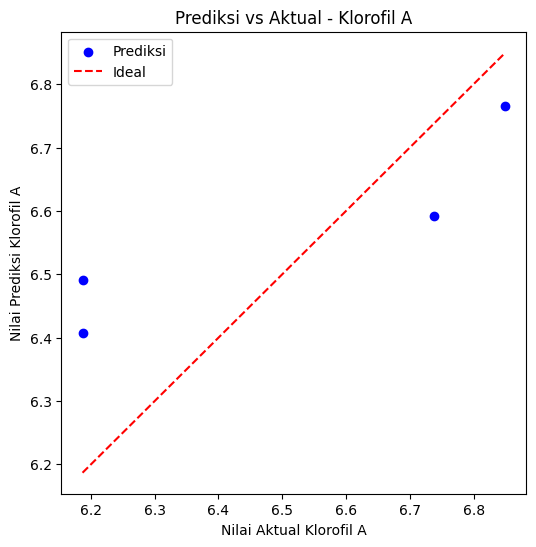

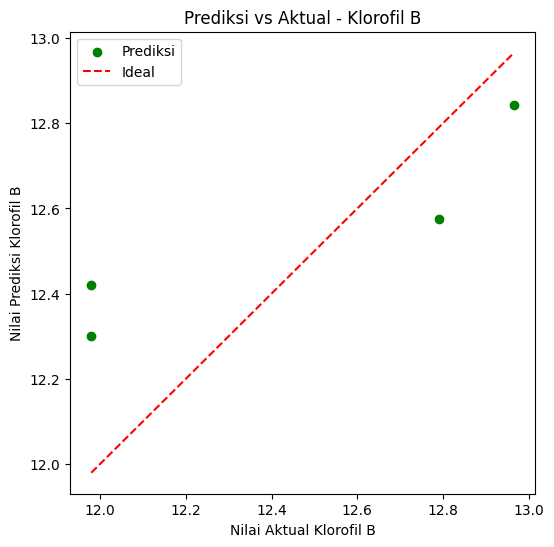

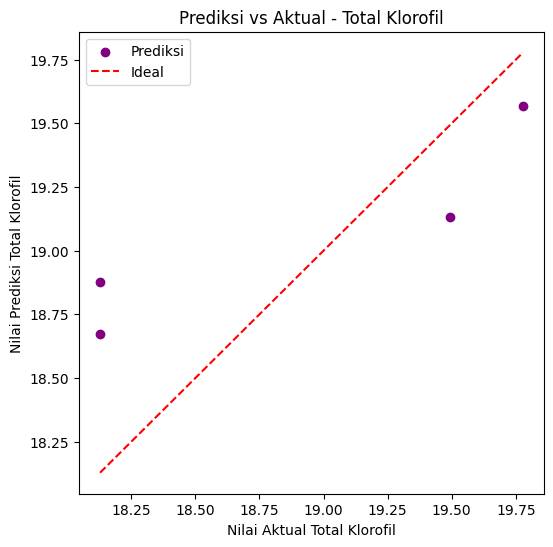

In [28]:
import matplotlib.pyplot as plt

# Visualisasi Prediksi Klorofil A
plt.figure(figsize=(6,6))
plt.scatter(y_test_A, y_pred_A, color='blue', label='Prediksi')
plt.plot([y_test_A.min(), y_test_A.max()], [y_test_A.min(), y_test_A.max()], 'r--', label='Ideal')
plt.xlabel('Nilai Aktual Klorofil A')
plt.ylabel('Nilai Prediksi Klorofil A')
plt.title('Prediksi vs Aktual - Klorofil A')
plt.legend()
plt.show()

# Visualisasi Prediksi Klorofil B
plt.figure(figsize=(6,6))
plt.scatter(y_test_B, y_pred_B, color='green', label='Prediksi')
plt.plot([y_test_B.min(), y_test_B.max()], [y_test_B.min(), y_test_B.max()], 'r--', label='Ideal')
plt.xlabel('Nilai Aktual Klorofil B')
plt.ylabel('Nilai Prediksi Klorofil B')
plt.title('Prediksi vs Aktual - Klorofil B')
plt.legend()
plt.show()

# Visualisasi Prediksi Total Klorofil
plt.figure(figsize=(6,6))
plt.scatter(y_test_total, y_pred_total, color='purple', label='Prediksi')
plt.plot([y_test_total.min(), y_test_total.max()], [y_test_total.min(), y_test_total.max()], 'r--', label='Ideal')
plt.xlabel('Nilai Aktual Total Klorofil')
plt.ylabel('Nilai Prediksi Total Klorofil')
plt.title('Prediksi vs Aktual - Total Klorofil')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Fungsi evaluasi
def evaluasi_model(y_true, y_pred, nama_target):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    r2 = r2_score(y_true, y_pred)

    print(f"\n=== Evaluasi Model Regresi (ExG → {nama_target}) ===")
    print(f"MAE  : {mae:.4f}")
    print(f"MSE  : {mse:.4f}")
    print(f"MAPE : {mape:.2f}%")
    print(f"R²   : {r2:.4f}")

# Evaluasi untuk Klorofil A
evaluasi_model(combined['Klorofil_A'], combined['Prediksi_Klorofil_A'], 'Klorofil A')

# Evaluasi untuk Klorofil B
evaluasi_model(combined['Klorofil_B'], combined['Prediksi_Klorofil_B'], 'Klorofil B')

# Evaluasi untuk Total Klorofil
evaluasi_model(combined['Total_Klorofil'], combined['Prediksi_Total_Klorofil'], 'Total Klorofil')



=== Evaluasi Model Regresi (ExG → Klorofil A) ===
MAE  : 0.2060
MSE  : 0.0639
MAPE : 3.18%
R²   : 0.0483

=== Evaluasi Model Regresi (ExG → Klorofil B) ===
MAE  : 0.3049
MSE  : 0.1404
MAPE : 2.45%
R²   : 0.0461

=== Evaluasi Model Regresi (ExG → Total Klorofil) ===
MAE  : 0.5115
MSE  : 0.3943
MAPE : 2.71%
R²   : 0.0474


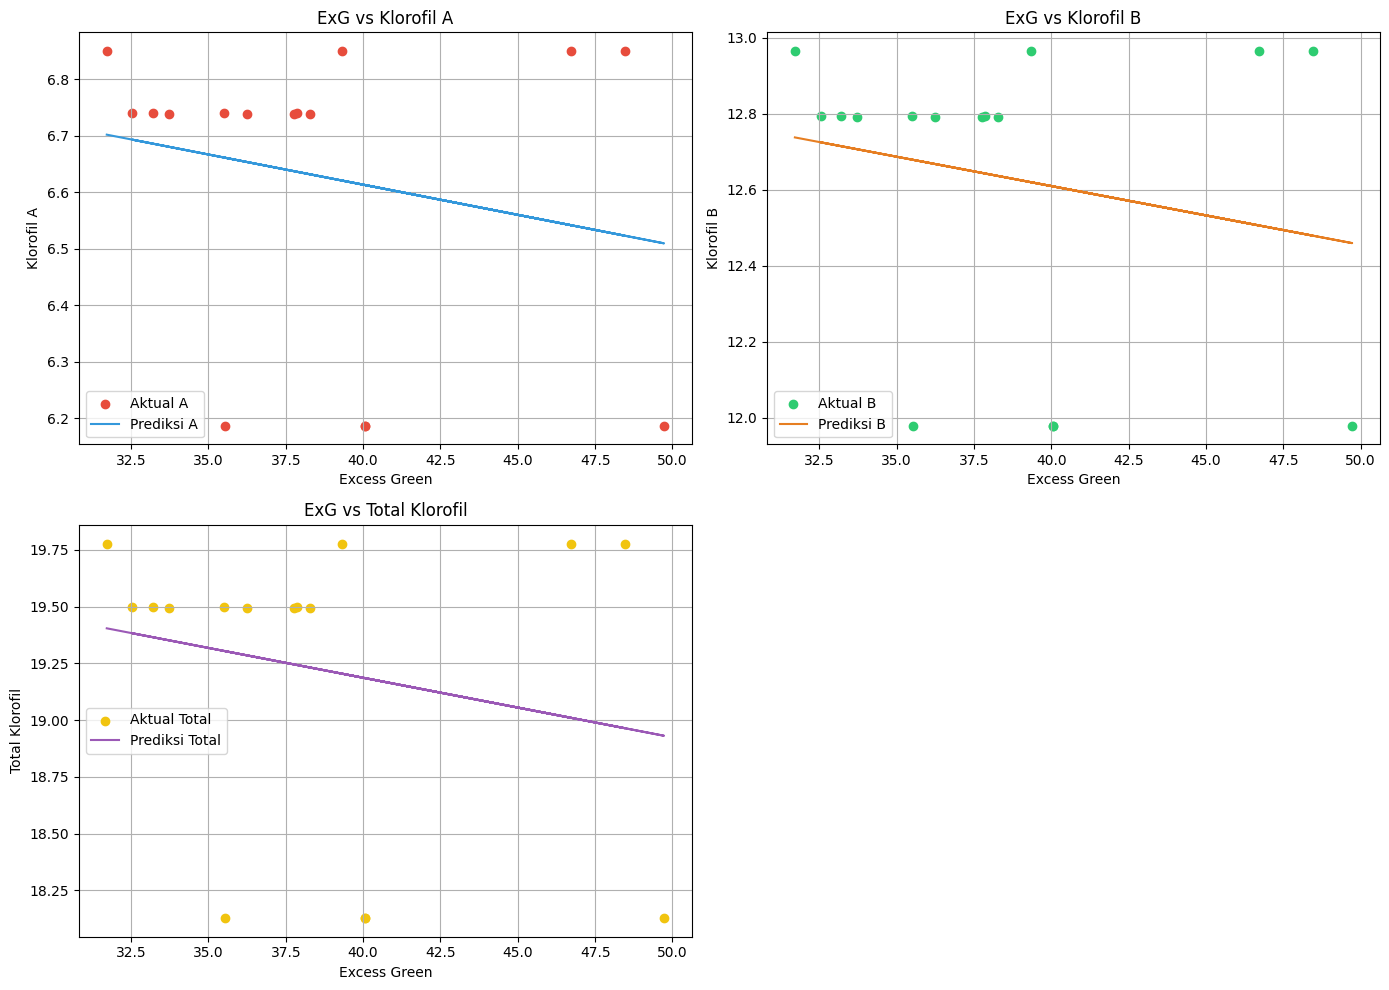

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(2, 2)

# Subplot Klorofil A
ax1 = plt.subplot(gs[0, 0])
ax1.scatter(combined['Excess_Green'], combined['Klorofil_A'], color='#e74c3c', label='Aktual A')
ax1.plot(combined['Excess_Green'], combined['Prediksi_Klorofil_A'], color='#3498db', label='Prediksi A')
ax1.set_title('ExG vs Klorofil A')
ax1.set_xlabel('Excess Green')
ax1.set_ylabel('Klorofil A')
ax1.legend()
ax1.grid(True)

# Subplot Klorofil B
ax2 = plt.subplot(gs[0, 1])
ax2.scatter(combined['Excess_Green'], combined['Klorofil_B'], color='#2ecc71', label='Aktual B')
ax2.plot(combined['Excess_Green'], combined['Prediksi_Klorofil_B'], color='#e67e22', label='Prediksi B')
ax2.set_title('ExG vs Klorofil B')
ax2.set_xlabel('Excess Green')
ax2.set_ylabel('Klorofil B')
ax2.legend()
ax2.grid(True)

# Subplot Total Klorofil
ax3 = plt.subplot(gs[1, 0])
ax3.scatter(combined['Excess_Green'], combined['Total_Klorofil'], color='#f1c40f', label='Aktual Total')
ax3.plot(combined['Excess_Green'], combined['Prediksi_Total_Klorofil'], color='#9b59b6', label='Prediksi Total')
ax3.set_title('ExG vs Total Klorofil')
ax3.set_xlabel('Excess Green')
ax3.set_ylabel('Total Klorofil')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()

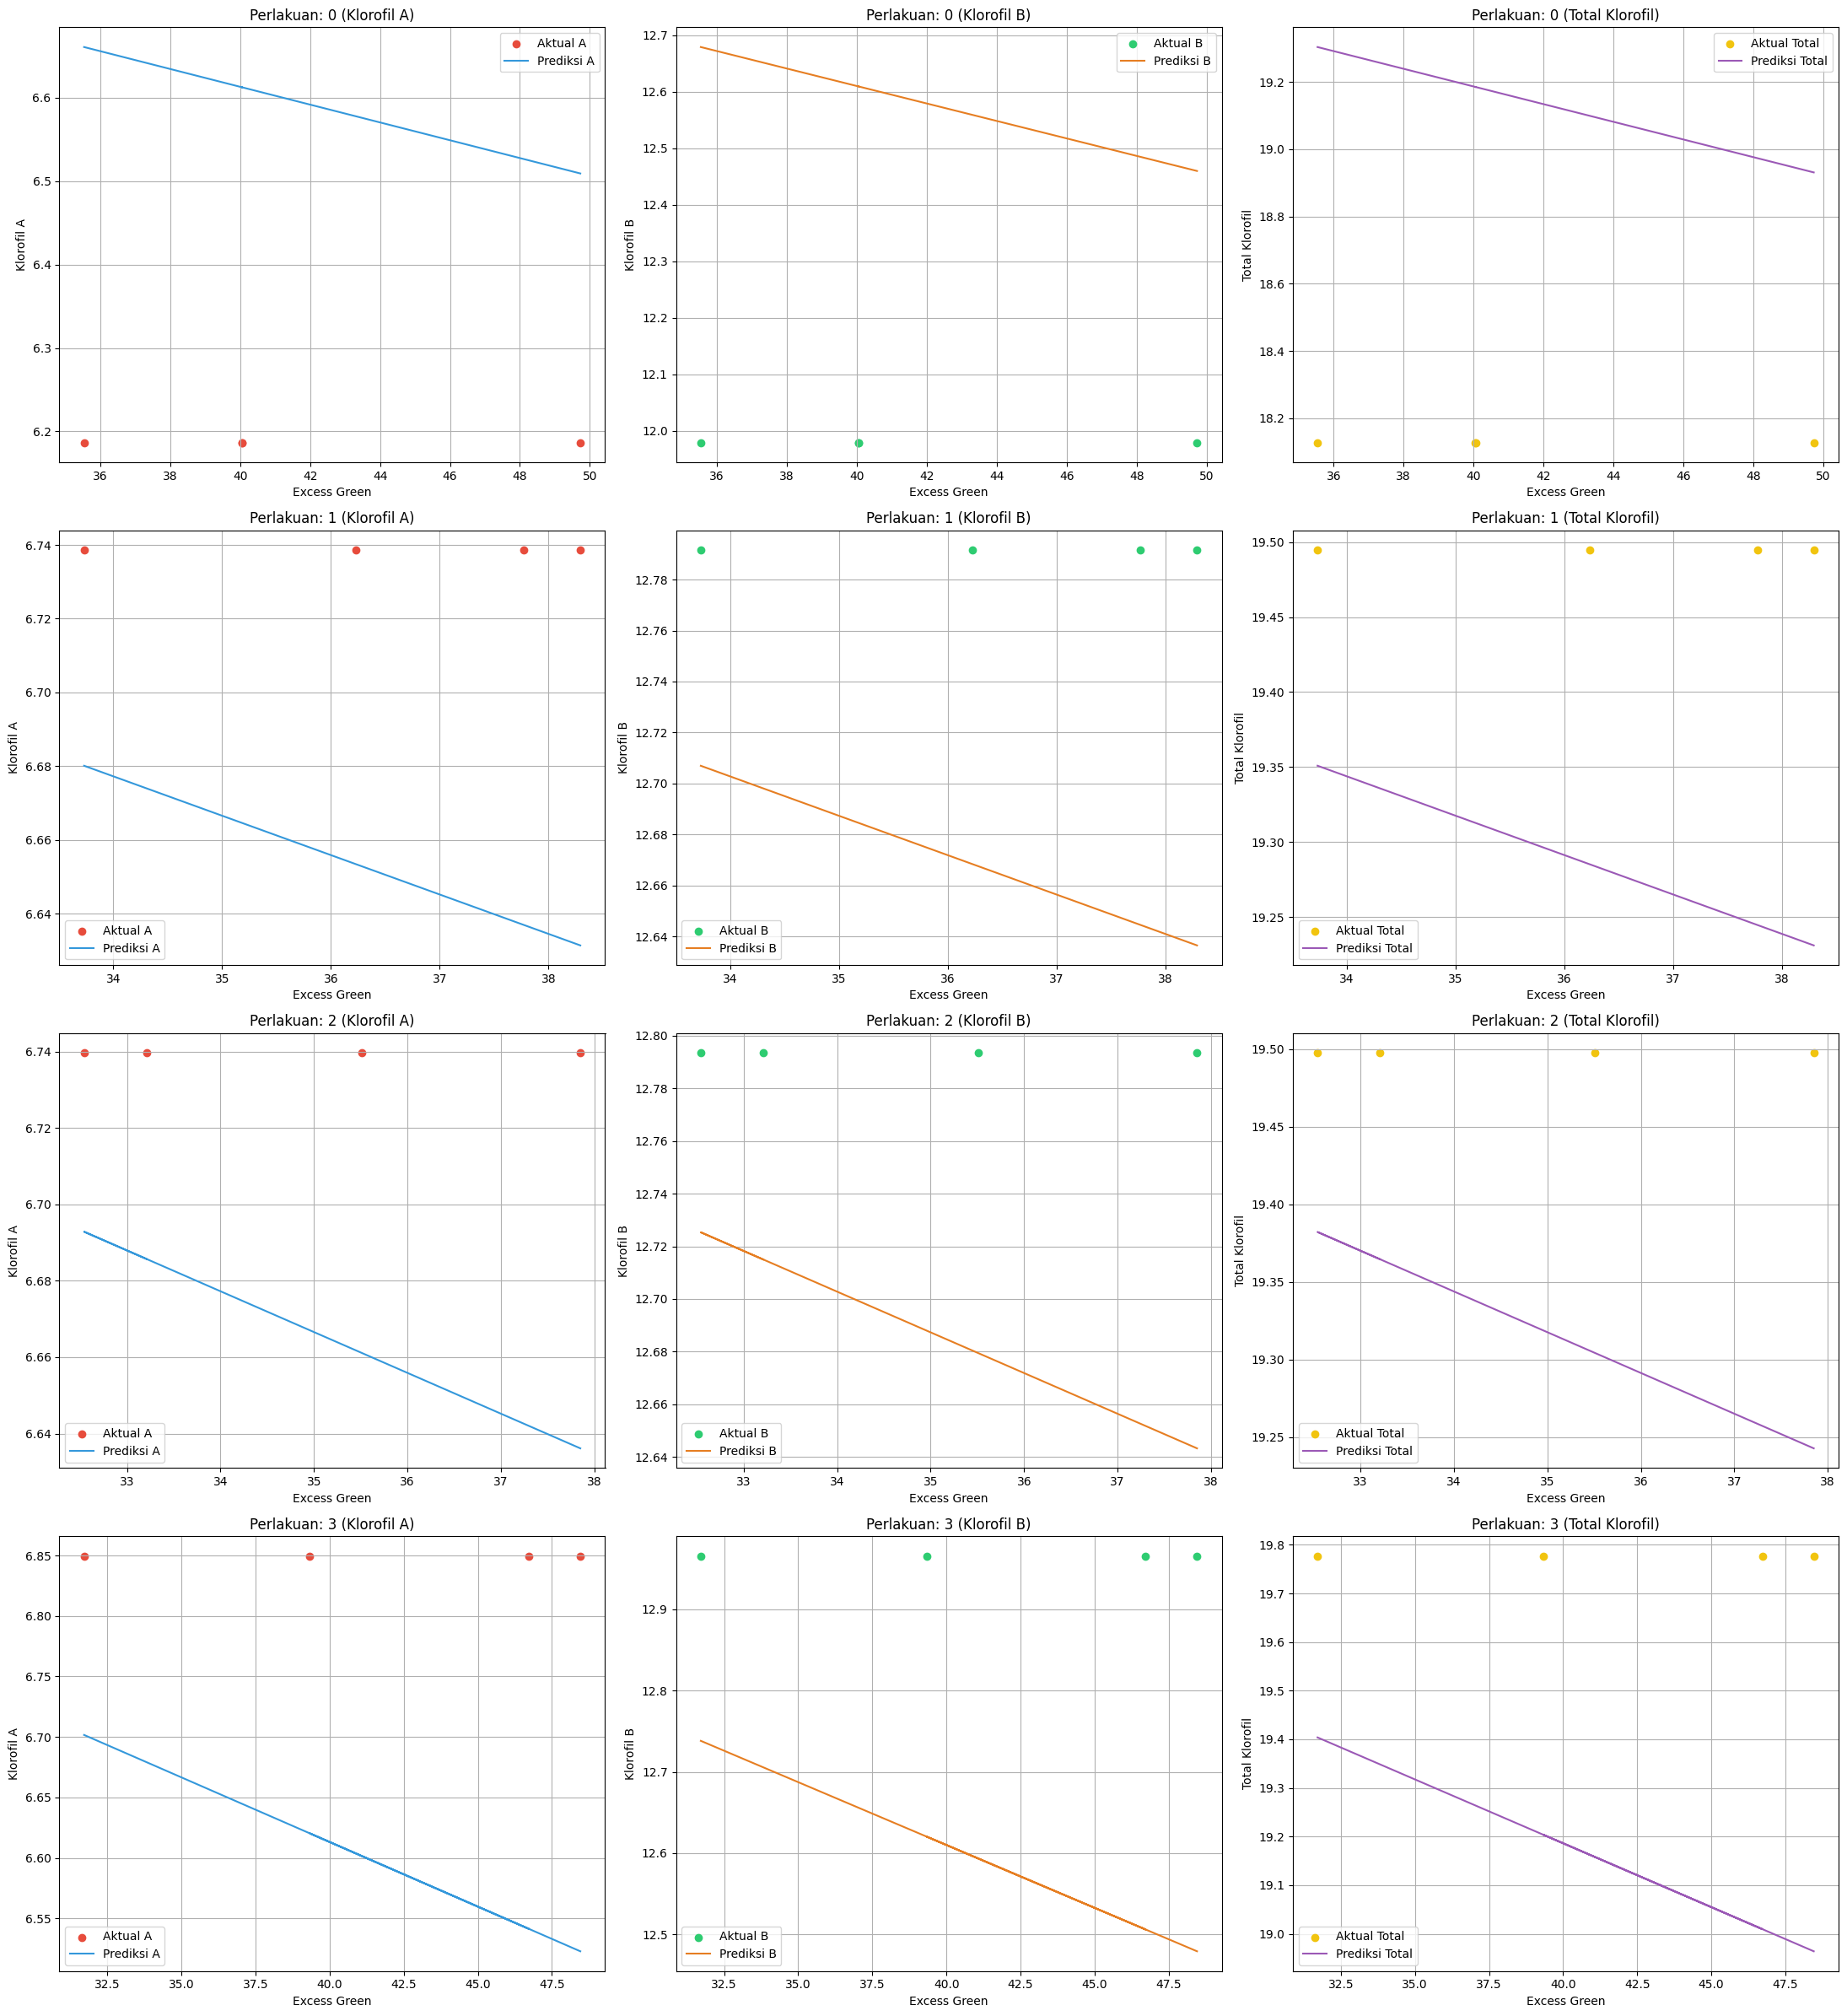

In [ ]:
perlakuan_list = combined['Perlakuan'].unique()

# Buat plot
fig, axs = plt.subplots(len(perlakuan_list), 3, figsize=(22, 6 * len(perlakuan_list)))

for i, perlakuan in enumerate(perlakuan_list):
    subset = combined[combined['Perlakuan'] == perlakuan]
    
    # Subplot Klorofil A
    axs[i, 0].scatter(subset['Excess_Green'], subset['Klorofil_A'], color='#e74c3c', label='Aktual A')
    axs[i, 0].plot(subset['Excess_Green'], subset['Prediksi_Klorofil_A'], color='#3498db', label='Prediksi A')
    axs[i, 0].set_title(f'Perlakuan: {perlakuan} (Klorofil A)')
    axs[i, 0].set_xlabel('Excess Green')
    axs[i, 0].set_ylabel('Klorofil A')
    axs[i, 0].legend()
    axs[i, 0].grid(True)

    # Subplot Klorofil B
    axs[i, 1].scatter(subset['Excess_Green'], subset['Klorofil_B'], color='#2ecc71', label='Aktual B')
    axs[i, 1].plot(subset['Excess_Green'], subset['Prediksi_Klorofil_B'], color='#e67e22', label='Prediksi B')
    axs[i, 1].set_title(f'Perlakuan: {perlakuan} (Klorofil B)')
    axs[i, 1].set_xlabel('Excess Green')
    axs[i, 1].set_ylabel('Klorofil B')
    axs[i, 1].legend()
    axs[i, 1].grid(True)

    # Subplot Total Klorofil
    axs[i, 2].scatter(subset['Excess_Green'], subset['Total_Klorofil'], color='#f1c40f', label='Aktual Total')
    axs[i, 2].plot(subset['Excess_Green'], subset['Prediksi_Total_Klorofil'], color='#9b59b6', label='Prediksi Total')
    axs[i, 2].set_title(f'Perlakuan: {perlakuan} (Total Klorofil)')
    axs[i, 2].set_xlabel('Excess Green')
    axs[i, 2].set_ylabel('Total Klorofil')
    axs[i, 2].legend()
    axs[i, 2].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(model_A, 'model_klorofil_a_linear.pkl')
joblib.dump(model_B, 'model_klorofil_b_linear.pkl')
joblib.dump(model_total, 'model_klorofil_total_linear.pkl')

['model_klorofil_total_linear.pkl']

In [ ]:
# --- STATISTICAL SUMMARY ---
print("=== Ringkasan Statistik Data ===")
print(combined[['Excess_Green', 'Klorofil_A', 'Klorofil_B', 'Total_Klorofil']].describe())

=== Ringkasan Statistik Data ===
       Excess_Green  Klorofil_A  Klorofil_B  Total_Klorofil
count     16.000000   16.000000   16.000000       16.000000
mean      38.546715    6.628690   12.632522       19.224393
std        5.504247    0.267582    0.396169        0.664439
min       31.713265    6.186804   11.979488       18.127974
25%       35.065801    6.600673   12.588585       19.153049
50%       37.812254    6.739129   12.792529       19.496151
75%       40.054714    6.767146   12.836466       19.567495
max       49.726389    6.849696   12.965544       19.777296
